<a href="https://colab.research.google.com/github/ketankarlekar/Face-mask-detection/blob/main/face_mask_detection_withCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
!pip install kaggle


In [76]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [77]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [78]:
# extracting the zip file
from zipfile import ZipFile
dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset, 'r')as zip:
  zip.extractall()
  print("The data set is Extracted")

The data set is Extracted


In [79]:
!ls


data  download.jpg  face-mask-dataset.zip  images.jpg  images.webp  sample_data


**Import the Dependencies**

In [80]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split



In [81]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_846.jpg', 'with_mask_2934.jpg', 'with_mask_2307.jpg', 'with_mask_3653.jpg', 'with_mask_1208.jpg']
['with_mask_3189.jpg', 'with_mask_2390.jpg', 'with_mask_2738.jpg', 'with_mask_750.jpg', 'with_mask_3051.jpg']


In [82]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_569.jpg', 'without_mask_997.jpg', 'without_mask_2648.jpg', 'without_mask_1823.jpg', 'without_mask_391.jpg']
['without_mask_3759.jpg', 'without_mask_3264.jpg', 'without_mask_1421.jpg', 'without_mask_1636.jpg', 'without_mask_3199.jpg']


In [83]:
print("Number of masked images", len(with_mask_files))
print("Number of without masked images", len(without_mask_files))

Number of masked images 3725
Number of without masked images 3828


** Creating a Labels for two class Images **

with mask = 1
without mask = 0

In [84]:
#creating a labels

with_mask_label = [1]*len(with_mask_files)

without_mask_label = [0]*len(without_mask_files)



In [85]:
print(with_mask_label[:5])
print(without_mask_label[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [86]:

print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [87]:
labels  = with_mask_label  + without_mask_label

print(len(labels))

print(labels[0:5])

print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying Images**

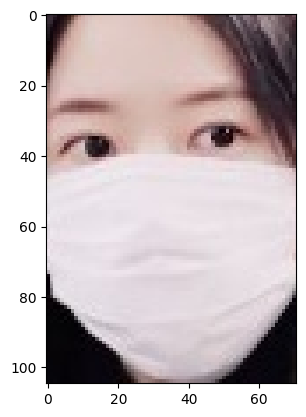

In [88]:
#displaying images for mask images
img = mpimage.imread("/content/data/with_mask/with_mask_650.jpg")
imgplot = plt.imshow(img)
plt.show()

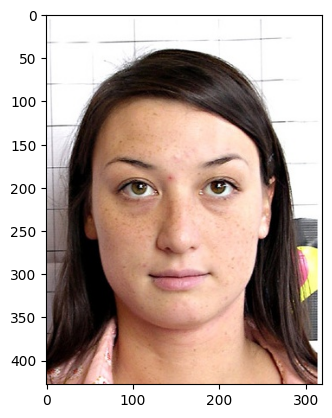

In [89]:
#displaying images for without mask images
img = mpimage.imread("/content/data/without_mask/without_mask_650.jpg")
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the images
2. Convert the images to Numpy arrays


In [90]:
#convert images to numoy array +

with_mask_path = "/content/data/with_mask/"

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



#without mask
without_mask_path = "/content/data/without_mask/"


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [91]:
type(data)

list

In [92]:
len(data)

7553

In [93]:
type(data[698])

numpy.ndarray

In [94]:
data[0].shape

(128, 128, 3)

In [95]:
#converting an Image list and label list to numpy array

X = np.array(data)
Y = np.array(labels)


In [96]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [97]:
print(X.shape)
print(Y.shape)


(7553, 128, 128, 3)
(7553,)


In [98]:

print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [99]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [100]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [101]:
#scalling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[182, 151, 110],
        [172, 146, 103],
        [164, 142, 100],
        ...,
        [  8,   3,   0],
        [  9,   4,   1],
        [ 11,   6,   3]],

       [[180, 150, 108],
        [174, 149, 106],
        [168, 146, 104],
        ...,
        [  7,   2,   0],
        [  9,   4,   1],
        [ 10,   5,   2]],

       [[178, 150, 108],
        [177, 152, 109],
        [171, 150, 108],
        ...,
        [  7,   2,   0],
        [  8,   3,   0],
        [ 10,   5,   2]],

       ...,

       [[217, 178, 116],
        [211, 176, 121],
        [155, 125,  81],
        ...,
        [ 73,  46,  22],
        [ 49,  27,   8],
        [ 30,  13,   0]],

       [[206, 168, 110],
        [209, 174, 120],
        [164, 133,  85],
        ...,
        [ 73,  45,  21],
        [ 50,  28,   8],
        [ 31,  14,   0]],

       [[195, 158,  99],
        [205, 171, 116],
        [173, 142,  94],
        ...,
        [ 75,  47,  23],
        [ 52,  30,  10],
        [ 33,  16,   1]]], dtype=uint8)
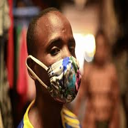

In [102]:
X_train[0]


In [103]:
X_train_scaled[0]

array([[[0.71372549, 0.59215686, 0.43137255],
        [0.6745098 , 0.57254902, 0.40392157],
        [0.64313725, 0.55686275, 0.39215686],
        ...,
        [0.03137255, 0.01176471, 0.        ],
        [0.03529412, 0.01568627, 0.00392157],
        [0.04313725, 0.02352941, 0.01176471]],

       [[0.70588235, 0.58823529, 0.42352941],
        [0.68235294, 0.58431373, 0.41568627],
        [0.65882353, 0.57254902, 0.40784314],
        ...,
        [0.02745098, 0.00784314, 0.        ],
        [0.03529412, 0.01568627, 0.00392157],
        [0.03921569, 0.01960784, 0.00784314]],

       [[0.69803922, 0.58823529, 0.42352941],
        [0.69411765, 0.59607843, 0.42745098],
        [0.67058824, 0.58823529, 0.42352941],
        ...,
        [0.02745098, 0.00784314, 0.        ],
        [0.03137255, 0.01176471, 0.        ],
        [0.03921569, 0.01960784, 0.00784314]],

       ...,

       [[0.85098039, 0.69803922, 0.45490196],
        [0.82745098, 0.69019608, 0.4745098 ],
        [0.60784314, 0

**Buliding CNN**


In [104]:
import tensorflow as tf
from tensorflow import keras

In [105]:
num_of_classes = 2
model = keras.Sequential()


model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))


model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu',))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [107]:
#training the neural network

history = model.fit(X_train_scaled, Y_train, validation_split = 0.1,epochs = 10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - acc: 0.7311 - loss: 0.6048 - val_acc: 0.8860 - val_loss: 0.2651
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - acc: 0.8794 - loss: 0.2943 - val_acc: 0.9058 - val_loss: 0.2427
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9058 - loss: 0.2473 - val_acc: 0.9256 - val_loss: 0.2066
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9241 - loss: 0.1952 - val_acc: 0.9289 - val_loss: 0.1911
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9335 - loss: 0.1512 - val_acc: 0.9140 - val_loss: 0.2232
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9473 - loss: 0.1368 - val_acc: 0.9339 - val_loss: 0.2038
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9588 - loss: 0.1104 - val_acc: 0.9339 - val_loss: 0.2080
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9620 - loss: 0.0974 - val_acc: 0.9256 - val_loss: 0.2342
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms

**Model Evaluation**

In [108]:
loss, accuracy = model.evaluate(X_test_scaled , Y_test)
print('Test Accuracy: ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.9533 - loss: 0.1506
Test Accuracy:  0.9430840611457825


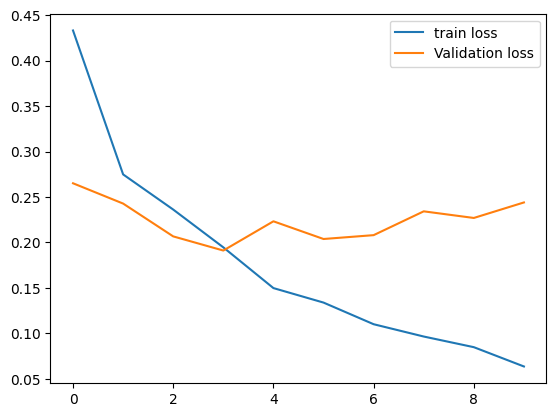

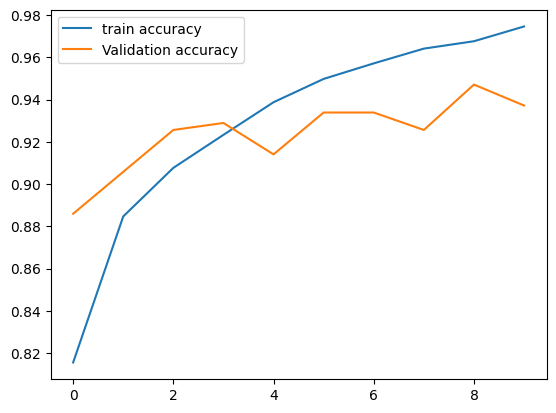

In [109]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.show()


#plot the Accuracy Value
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'Validation accuracy')
plt.legend()
plt.show()


Path of the image to be predicted: /content/images.webp


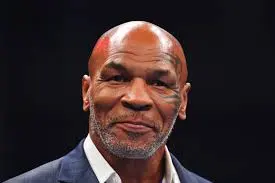

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[0.71406907 0.19414087]]
0
The person in the image is not wearing a mask


In [111]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


# New section